# FeedForward 🥸

taken from neural_networks_tutorial

In [1]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np


In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras.models import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import *


In [3]:
train, test = ff.ready_to_be_used_dataset(
    42, image_squared_size=100, color_mode="grayscale"
)


Found 23401 files belonging to 2 classes.
Using 18721 files for training.
Found 23401 files belonging to 2 classes.
Using 4680 files for validation.


In [4]:
image_batch, labels_batch = next(iter(train))
print(image_batch.shape, labels_batch.shape)


(42, 100, 100, 1) (42,)


#### Model1 definition

In [5]:
model = Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 100)               1000100   
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,000,302
Trainable params: 1,000,302
Non-trainable params: 0
_________________________________________________________________


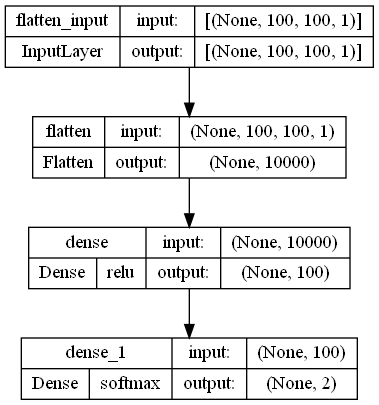

In [6]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [7]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [8]:
history = model.fit(train, validation_data=test, epochs=5)


Epoch 1/5
446/446 [==============================] - 20s 43ms/step - loss: 0.7630 - accuracy: 0.5375 - val_loss: 0.6782 - val_accuracy: 0.5724
Epoch 2/5
446/446 [==============================] - 17s 37ms/step - loss: 0.6799 - accuracy: 0.5707 - val_loss: 0.6787 - val_accuracy: 0.5782
Epoch 3/5
446/446 [==============================] - 17s 39ms/step - loss: 0.6688 - accuracy: 0.5941 - val_loss: 0.6740 - val_accuracy: 0.5771
Epoch 4/5
446/446 [==============================] - 20s 45ms/step - loss: 0.6644 - accuracy: 0.5976 - val_loss: 0.6632 - val_accuracy: 0.5991
Epoch 5/5
446/446 [==============================] - 19s 43ms/step - loss: 0.6586 - accuracy: 0.6062 - val_loss: 0.6612 - val_accuracy: 0.6024
CPU times: total: 3min 13s
Wall time: 1min 33s


#### Performance evaluation

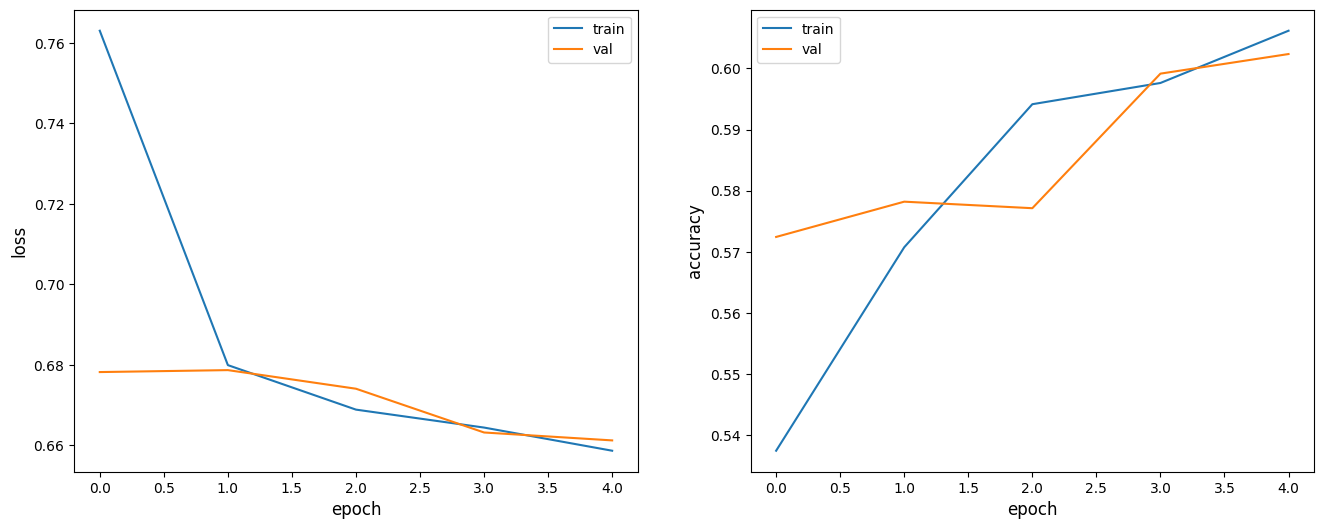

In [9]:
ff.performance_plot(history)


#### Model2 definition

In [ ]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(2000, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [ ]:
ff.performance_plot(history)


#### Model3 definition

In [ ]:
model = Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(1500, activation="relu"),
        Dense(500, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [ ]:
ff.performance_plot(history)
